# Short Assignment 1 Solutions

---

# Question 1

In this assignment, you will be working with the "beer foam" dataset. 

* The [beer foam dataset](http://www.stat.ufl.edu/~winner/datasets.html) was collected by A. Leike and published in their work titled "Demonstration of the Exponential Decay Law Using Beer Froth" in 2002.

#### Data Set Description

The data contains measurements of wet foam height and beer height at various time points for 3 brands of beer. The author of this data set fit an *exponential decay model* of the form $H(t) = H_0 e^{-\lambda t}$.

The data set is saved as a *.csv* file (**"beer_foam.csv"**) with information about the foam height (in cm) from 3 brands of beer over 15 measurement times (in seconds) after the time of pour.

The file is organized in 4 columns:
1. Time from pour (in seconds)
2. Erdinger Weissbier foam height (in cm)
3. Augustinerbrau Munchen foam height (in cm)
4. Budweiser foam height (in cm)

Answer the following questions:

1. Load the data using ```pandas```.

For the rest of this assignment, consider the first 12 samples as the training set, and the last 3 samples as the test set.

2. Build and train a polynomial regression model for **each** bear brand with model order $M=4$.

3. Build and train an exponential model of the form $y(x)=e^{w_0+w_1x}$ for **each** bear brand.

4. Predict the foam height for **each** beer brand at $t=450~$seconds after pour using the trained polynomial regression model (from problem 2) and exponential model (from problem 3).

5. Compare both models using plots (qualitative measure) and select a measure to assess the goodness-of-fit (quantitative measure, e.g. MSE). Based on these results and prediction for $t=450~$seconds for both models, discuss which performed best on this data.

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Problem 1
data = pd.read_csv('beer_foam.csv')
data

,Time,Erdinger,Augustinerbrau,Budweiser
0,0,17.0,14.0,14.0
1,15,16.1,11.8,12.1
2,30,14.9,10.5,10.9
3,45,14.0,9.3,10.0
4,60,13.2,8.5,9.3
5,75,12.5,7.7,8.6
6,90,11.9,7.1,8.0
7,105,11.2,6.5,7.5
8,120,10.7,6.0,7.0
9,150,9.7,5.3,6.2


In [3]:
time = data['Time'].to_numpy()

height = data[data.columns[1:]].to_numpy()

The next function implements polynomial regression and uses the coefficient of determination as the validation metric.

In [4]:
# Problem 2 and 4

def PolynomialFit(x,t,M,name=None,display=True):
    # Train Set
    xtrain, ttrain = x[:12], t[:12]
    
    # Test Set
    xtest, ttest = x[12:],t[12:]
    
    # Feature matrix for training
    X = np.array([xtrain**m for m in range(M+1)]).T
    # Coefficients
    w = la.pinv(X)@ttrain 
    #prediction for training
    ytrain = X@w

    # Feature matrix for test
    Xtest = np.array([xtest**m for m in range(M+1)]).T
    #prediction for test
    ytest = Xtest@w
    
    # prediction for time = 450 seconds
    x450 = [450**m for m in range(M+1)]
    pred450 = x450@w
    
    # Metric of sucess: coefficient of determination (r^2)
    m, b, rtrain, _, _ = stats.linregress(np.sort(ytrain), np.sort(ttrain))
    _, _, rtest, _, _ = stats.linregress(np.sort(ytest), np.sort(ttest))
    xvalues_train = np.linspace(np.min(ttrain), np.max(ttrain),100)
    xvalues_test = np.linspace(np.min(ttest), np.max(ttest),100)    
    
    if display:
        fig=plt.figure(figsize=(20,5))
        fig.add_subplot(1,3,1)
        plt.scatter(xtrain,ttrain, c='b',label='training data')
        plt.scatter(xtest,ttest, c='c',label='test data')
        plt.plot(xtrain,ytrain,'-r', label='training model')
        plt.plot(xtest,ytest,'--g', label='test prediction')
        plt.plot(450,pred450,'*r',label='prediction for t=450s')
        plt.xlabel('Time after pour, in seconds')
        plt.ylabel('Foam Height, in cm')
        plt.legend()
        if name:
            plt.title(name + '\nAt t=450s, foam height= '+str(np.round(pred450,2))+' cm');

        fig.add_subplot(1,3,2)
        plt.scatter(np.sort(ttrain), np.sort(ytrain), c='b')
        plt.plot(xvalues_train, xvalues_train, 'r')
        plt.xlabel('Target Quantiles - train')
        plt.ylabel('Estimated Quantiles - train')
        if name:
            plt.title(name + ' (Train $r^2 = $ ' + str(np.round(rtrain**2,4)) + ')')
               
        fig.add_subplot(1,3,3)
        plt.scatter(np.sort(ttest), np.sort(ytest), c='b')
        plt.plot(xvalues_test, xvalues_test, 'r')
        plt.xlabel('Target Quantiles - test')
        plt.ylabel('Estimated Quantiles - test')
        if name:
            plt.title(name + ' (Test $r^2 = $ ' + str(np.round(rtest**2,4)) + ')')
        
    print('PERFORMANCE')
    print('Polynomial Model')
    print('M =',M)
    print('-------------------------------')
    print('TRAINING SET')
    print('N =', len(xtrain))
    print('r^2 =', rtrain**2,4)
    print('MSE = ', np.mean((ttrain-ytrain)**2),'\n')
    print('TEST SET')
    print('N =', len(xtest))
    print('r^2 =', rtest**2,4)
    print('MSE = ', np.mean((ttest-ytest)**2),'\n')
    print('PREDICTION FOR t = 450 s')
    print('Foam height: ',pred450, ' cm')
    print('-------------------------------')

PERFORMANCE
Polynomial Model
M = 3
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9995095610815932 4
MSE =  0.003483206184949714 

TEST SET
N = 3
r^2 = 0.9921806032175773 4
MSE =  0.03355133926465662 

PREDICTION FOR t = 450 s
Foam height:  1.5382047283120173  cm
-------------------------------


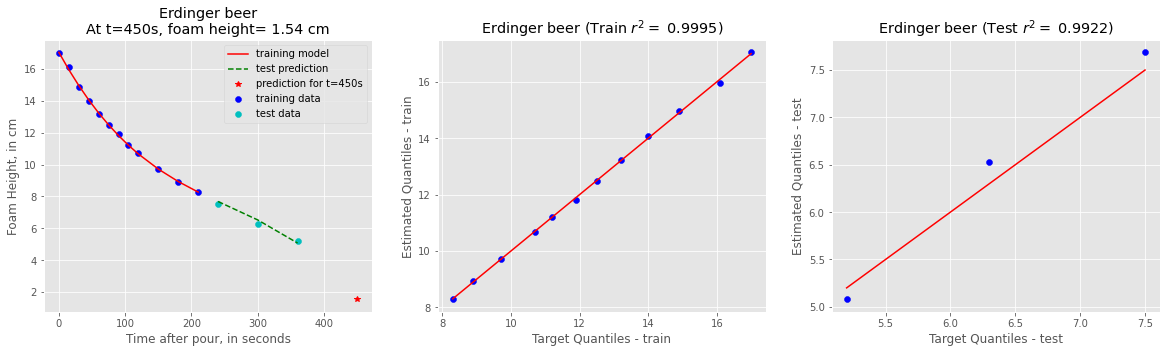

In [5]:
PolynomialFit(time, height[:,0],3,'Erdinger beer')

PERFORMANCE
Polynomial Model
M = 3
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9983658335752095 4
MSE =  0.01445102448144577 

TEST SET
N = 3
r^2 = 0.8237994893957123 4
MSE =  107.2651012854215 

PREDICTION FOR t = 450 s
Foam height:  -48.98218996900374  cm
-------------------------------


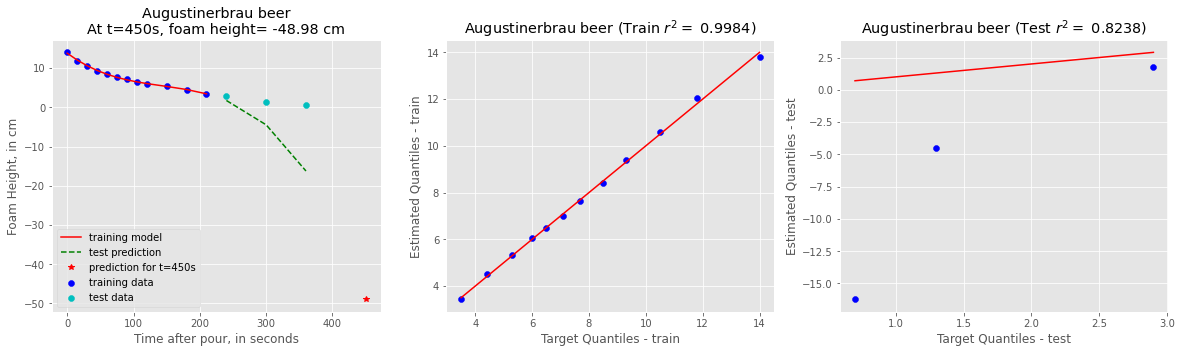

In [6]:
PolynomialFit(time, height[:,1],3,'Augustinerbrau beer')

PERFORMANCE
Polynomial Model
M = 3
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9980048015220161 4
MSE =  0.014206921606843175 

TEST SET
N = 3
r^2 = 0.9347343472397255 4
MSE =  70.72455059248502 

PREDICTION FOR t = 450 s
Foam height:  -40.892904978095096  cm
-------------------------------


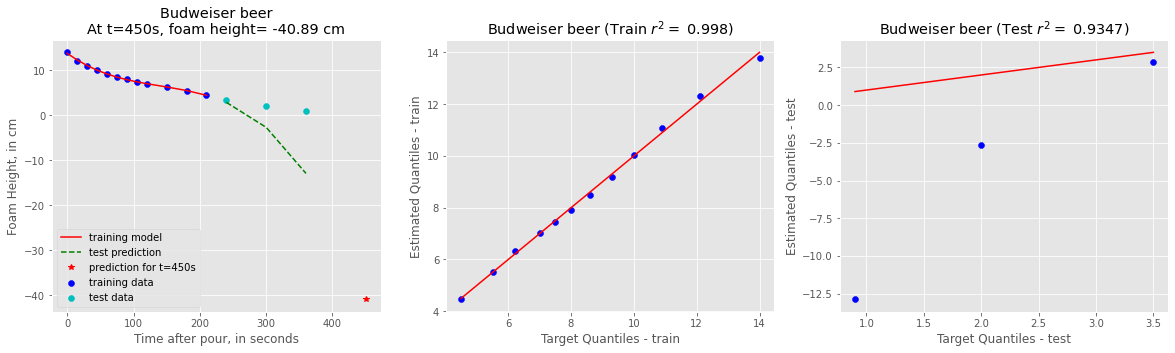

In [7]:
PolynomialFit(time, height[:,2],3,'Budweiser beer')

The next function implements exponential model and uses the coefficient of determination as the validation metric.

In [8]:
# Problem 3 and 5

def ExponentialFit(x,t,M,name=None,display=True):
    # Train Set
    xtrain, ttrain = x[:12], t[:12]
    ttrain_log=np.log(ttrain)
    
    # Test Set
    xtest, ttest = x[12:],t[12:]
    
    # Feature matrix for training
    X = np.array([xtrain**m for m in range(M+1)]).T
    # Coefficients
    w = la.pinv(X)@ttrain_log
    #prediction for training
    ytrain = np.exp(X@w)

    # Feature matrix for test
    Xtest = np.array([xtest**m for m in range(M+1)]).T
    #prediction for test
    ytest = np.exp(Xtest@w)
    
    # prediction for time = 450 seconds
    x450 = [450**m for m in range(M+1)]
    pred450 = np.exp(x450@w)
    
    # Metric of sucess: coefficient of determination (r^2)
    m, b, rtrain, _, _ = stats.linregress(np.sort(ytrain), np.sort(ttrain))
    _, _, rtest, _, _ = stats.linregress(np.sort(ytest), np.sort(ttest))
    xvalues_train = np.linspace(np.min(ttrain), np.max(ttrain),100)
    xvalues_test = np.linspace(np.min(ttest), np.max(ttest),100)  
    
    if display:
        fig=plt.figure(figsize=(15,5))
        fig.add_subplot(1,3,1)
        plt.scatter(xtrain,ttrain, c='b',label='training data')
        plt.scatter(xtest,ttest, c='c',label='test data')
        plt.plot(xtrain,ytrain,'-r', label='training model')
        plt.plot(xtest,ytest,'--g', label='test prediction')
        plt.plot(450,pred450,'*r',label='prediction for t=450s')
        plt.xlabel('Time after pour, in seconds')
        plt.ylabel('Foam Height, in cm')
        plt.legend()
        if name:
            plt.title(name + '\nAt t=450s, foam height= '+str(np.round(pred450,2))+' cm');

        fig.add_subplot(1,3,2)
        plt.scatter(np.sort(ttrain), np.sort(ytrain), c='b')
        plt.plot(xvalues_train, xvalues_train, 'r')
        plt.xlabel('Target Quantiles - train')
        plt.ylabel('Estimated Quantiles - train')
        if name:
            plt.title(name + ' (Train $r^2 = $ ' + str(np.round(rtrain**2,4)) + ')')
               
        fig.add_subplot(1,3,3)
        plt.scatter(np.sort(ttest), np.sort(ytest), c='b')
        plt.plot(xvalues_test, xvalues_test, 'r')
        plt.xlabel('Target Quantiles - test')
        plt.ylabel('Estimated Quantiles - test')
        if name:
            plt.title(name + ' (Test $r^2 = $ ' + str(np.round(rtest**2,4)) + ')')
        
    print('PERFORMANCE')
    print('Exponential Model')
    print('M =',M)
    print('-------------------------------')
    print('TRAINING SET')
    print('N =', len(xtrain))
    print('r^2 =', rtrain**2)
    print('MSE = ', np.mean((ttrain-ytrain)**2),'\n')
    print('TEST SET')
    print('N =', len(xtest))
    print('r^2 =', rtest**2)
    print('MSE = ', np.mean((ttest-ytest)**2),'\n')
    print('PREDICTION FOR t = 450 s')
    print('Foam height: ',pred450, ' cm')
    print('-------------------------------')

PERFORMANCE
Exponential Model
M = 1
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9912636358135651
MSE =  0.06791922889883455 

TEST SET
N = 3
r^2 = 0.9988039819110719
MSE =  0.17476035474137155 

PREDICTION FOR t = 450 s
Foam height:  3.4721600835417092  cm
-------------------------------


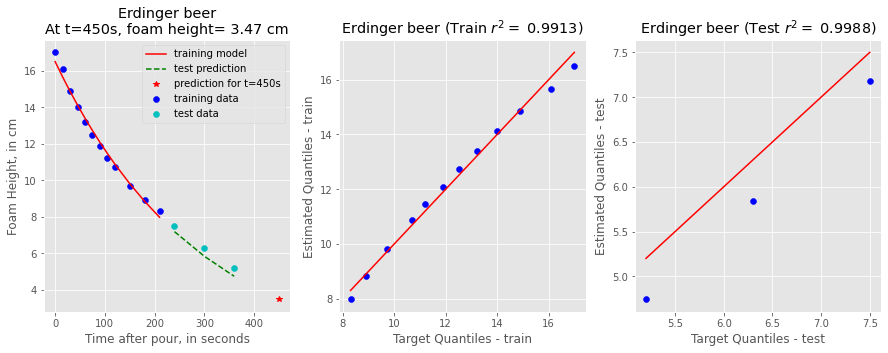

In [9]:
ExponentialFit(time, height[:,0],1,'Erdinger beer')

PERFORMANCE
Exponential Model
M = 1
-------------------------------
TRAINING SET
N = 12
r^2 = 0.98205376157249
MSE =  0.1790631433832386 

TEST SET
N = 3
r^2 = 0.9771573450737471
MSE =  0.32969727633036267 

PREDICTION FOR t = 450 s
Foam height:  0.8006371356057405  cm
-------------------------------


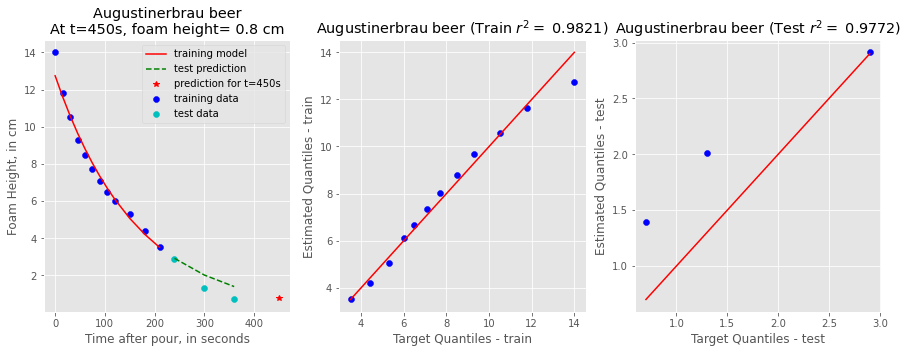

In [10]:
ExponentialFit(time, height[:,1],1,'Augustinerbrau beer')

PERFORMANCE
Exponential Model
M = 1
-------------------------------
TRAINING SET
N = 12
r^2 = 0.9822085271331701
MSE =  0.1372856788526843 

TEST SET
N = 3
r^2 = 0.9999921861715151
MSE =  0.8073492822525493 

PREDICTION FOR t = 450 s
Foam height:  1.357402031400266  cm
-------------------------------


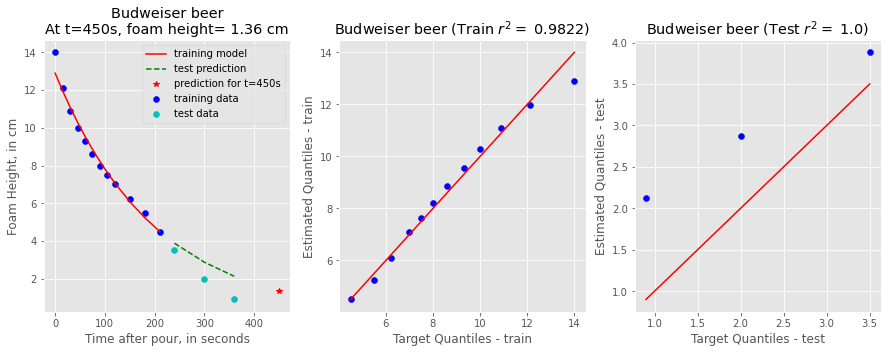

In [11]:
ExponentialFit(time, height[:,2],1,'Budweiser beer')

**Observations:**

1. The polynomial regression model predicted a foam height for $t=450$ seconds of each beer brand to be a negative value. This is because the mapper function does not encode any physical meaning about the *true* beer foam height model. On the other hand, the exponential model is best suited to encode this type of model, returning reasonably valued predictions for $t=450$ seconds.

2. For all three types of beer:
    * Even though the coefficient of determination ($r^2$) is slightly larger in the training data for the polynomial model, we see that for the samples reserved for the test set (last 3 samples), the $r^2$ is much larger for the exponential model. This indicates that the exponential model has a better **generalization** ability. Though to be fair, 3 samples is not enough data to statistical significantly select between the 2 models.
    * We can also see that the Mean Squared Errors (MSEs) for the test samples are much smaller for the exponential model than for the polynomial model, once more supporting the generalization ability claim.
    
3. Overall, the exponential model outperfoms the polynomial model because it produces better summary statistics for the test set suggesting good generalization, and it encodes physical properties about the data, such as foam height is a value greater than or equal to 0 but smaller than the foam height when $t=0$ seconds.

4. Note that if we were to compare the models using the data the model was trained with, we will be biasing our selection based on the model that overfitted the most. In subsequent assignments, we should always employ the best practices of experimental design.

---

# Question 2

Consider the noisy sinusoidal data we have been working with from lecture. 

Build a linear regression model with Gaussian basis functions as feature representations of the data. Consider the Gaussian basis functions:

\begin{align*}
\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2\sigma^2}\right\}
\end{align*}

where $\mu=\{0.1, 0.3, 0.6, 0.9\}$ for $j=1,2,3,4$, respectively, and a fixed standard deviation $\sigma=0.1$.

1. Train this model using the training set generated below.

2. Make predictions using the test set.

3. Provide a paragraph discussion about how you would determine how many Gaussian basis functions you would need and how would you determine the mean values $\mu_j$ and the bandwidth parameter $\sigma$.

In [12]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

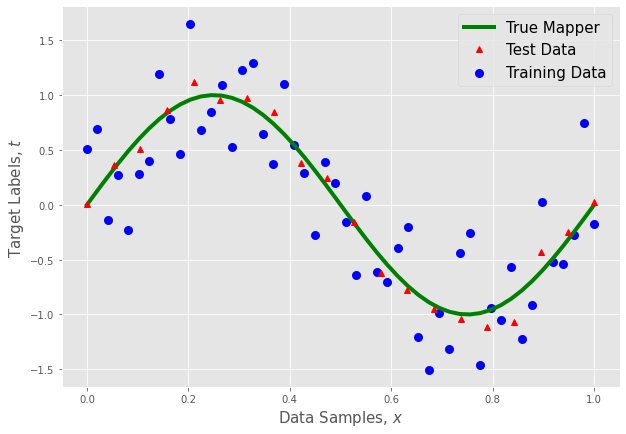

In [13]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

# Plotting
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [14]:
sig = 0.1

# feature matrix
X = np.array([np.exp(-(x_train-mu)**2/(2*sig**2)) for mu in [0.1, 0.3, 0.6, 0.9]]).T

X.shape

(50, 4)

In [15]:
X = np.hstack((np.ones((X.shape[0],1)),X))

X.shape

(50, 5)

In [16]:
def GaussianRegression(x,t):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    # Compute feature matrix X with Gaussian basis functions features
    X = np.array([np.exp(-(x_train-mu)**2/(2*sig**2)) for mu in [0.1, 0.3, 0.6, 0.9]]).T 
    X = np.hstack((np.ones((X.shape[0],1)),X))
    #computes Gaussian basis functions
    
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X)@X.T@t # Optimal set of parameters w
    
    # Compute model prediction
    y = X@w
    
    return w, y

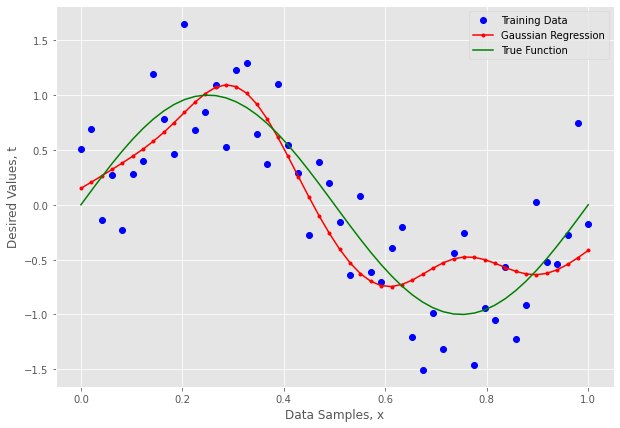

In [17]:
# Find the parameters that fit the noisy sinusoidal
w, y_train = GaussianRegression(x_train,t_train) 

plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Gaussian Regression')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

---

### Extra Visualizations of the Gaussian Basis Functions

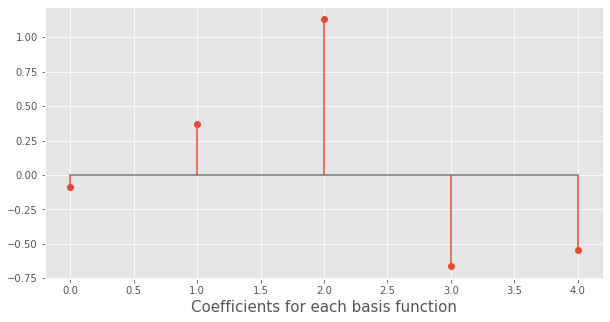

In [18]:
plt.figure(figsize=(10,5))
plt.stem(w)
plt.xlabel('Coefficients for each basis function',size=15);

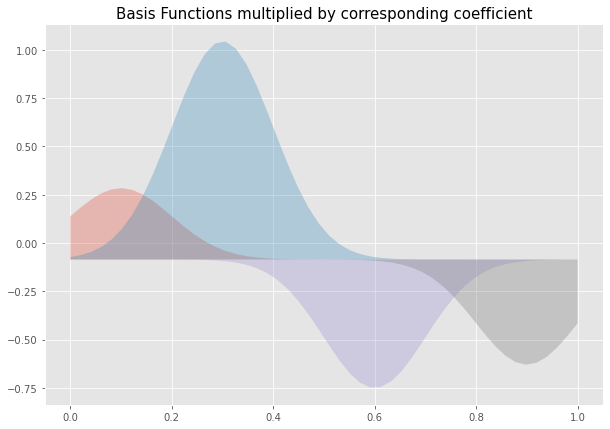

In [19]:
# Parameters for Gaussian Basis Functions
mu_vals=[0.1, 0.3, 0.6, 0.9]
sig=0.1

# Lambda function to create Gaussian basis function
gauss_basis=lambda x, mu, sig: np.exp(-(x-mu)**2/(2*sig**2))

plt.figure(figsize=(10,7))
for i in range(len(mu_vals)):
    plt.fill_between(x_train, w[i+1]*gauss_basis(x_train,mu_vals[i],sig)+w[0], w[0],alpha=0.3)
    plt.title('Basis Functions multiplied by corresponding coefficient',size=15);

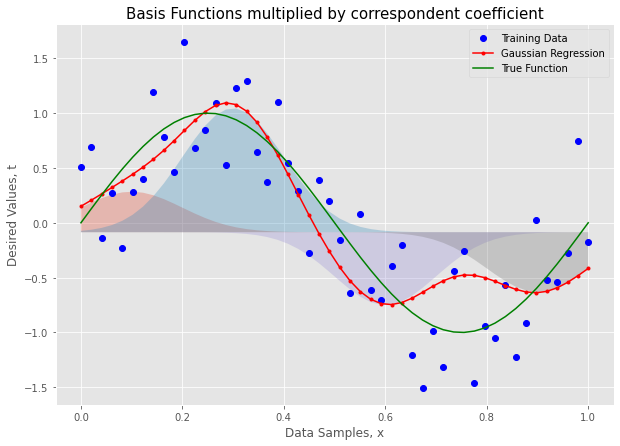

In [20]:
plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Gaussian Regression')
plt.plot(x_true,t_true,'g', label = 'True Function')
for i in range(len(mu_vals)):
    plt.fill_between(x_train, w[i+1]*gauss_basis(x_train,mu_vals[i],sig)+w[0], w[0],alpha=0.3)
    plt.title('Basis Functions multiplied by correspondent coefficient',size=15);
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

---

In [21]:
def GaussianRegression_test(x,w):
    # Feature matrix for test set
    X = np.array([np.exp(-(x-mu)**2/(2*sig**2)) for mu in [0.1, 0.3, 0.6, 0.9]]).T 
    X = np.hstack((np.ones((X.shape[0],1)),X))
    #computes Gaussian basis functions
    
    # Prediction for test set
    y = X@w
    
    return y

In [22]:
y_test = GaussianRegression_test(x_test, w)

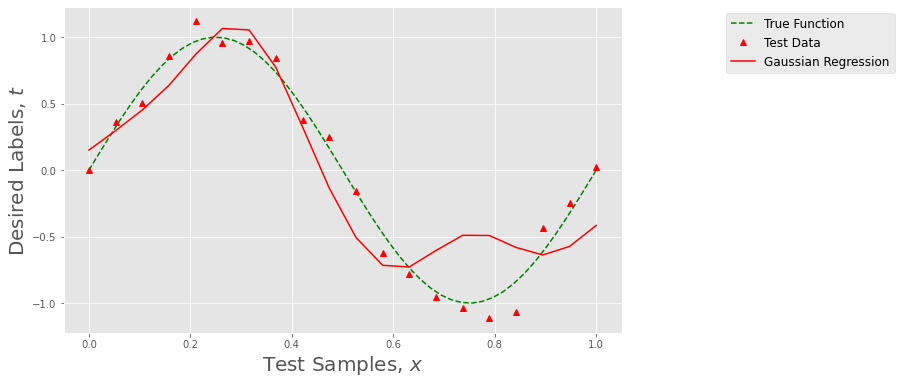

In [23]:
# Plotting
fig=plt.figure(figsize=(10,6))
plt.plot(x_true, t_true, '--g', label = 'True Function')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.plot(x_test, y_test,'r', label = 'Gaussian Regression')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Test Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

---